In [1]:
# 最终画图选的参数：
# DG 10 3 10
# EG 20 3 15
# zebrafish 20 3 10

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
from scipy.sparse import csr_matrix
import scvelo as scv
from torch.optim import SGD, Adam, Adagrad
from function import *

from utils import *
from g2g_model_Fisher import *


In [ ]:
data_path = f'data/'
path_path = "RC_path/"
figure_path="figure/cv_2/"
cmap = plt.colormaps['Spectral_r']
save = True

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
AnnData object with n_obs × n_vars = 2322 × 514
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta', 'palantir_pseudotime', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime'
    var: 'highly_variable_genes', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_colors', 'clusters_fine_colors', 'log1p', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighb

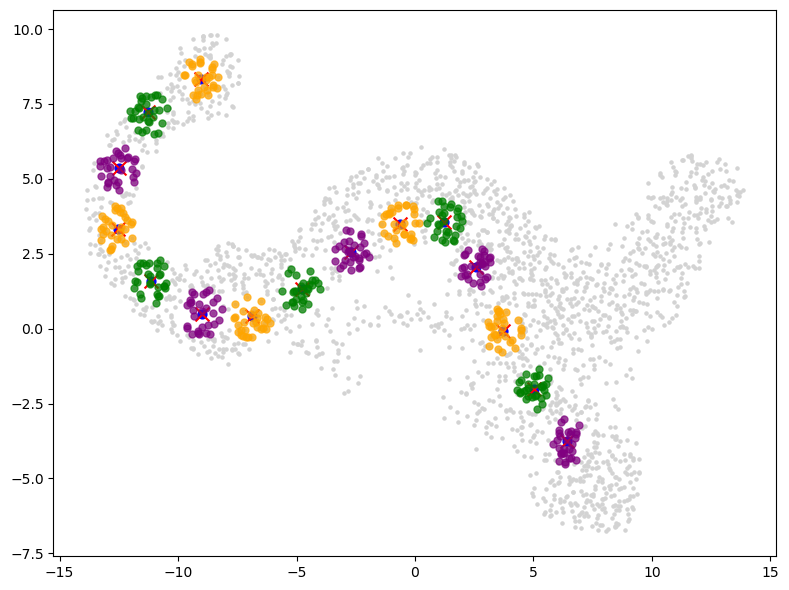

用的color_dict是： {'Ngn3 low EP': '#f4a460', 'Ngn3 high EP': '#fdbf6f', 'Fev+': '#ff7f00', 'Beta': '#b2df8a', 'Alpha': '#1f78b4'}
用的celltype_colors是： ['#ff7f00', '#1f78b4', '#fdbf6f', '#1f78b4', '#b2df8a', '#b2df8a', '#1f78b4', '#fdbf6f', '#f4a460', '#ff7f00', '#b2df8a', '#ff7f00', '#1f78b4', '#1f78b4', '#b2df8a', '#b2df8a', '#f4a460', '#b2df8a', '#1f78b4', '#ff7f00', '#ff7f00', '#b2df8a', '#1f78b4', '#b2df8a', '#1f78b4', '#b2df8a', '#b2df8a', '#1f78b4', '#fdbf6f', '#fdbf6f', '#fdbf6f', '#1f78b4', '#ff7f00', '#1f78b4', '#1f78b4', '#ff7f00', '#1f78b4', '#fdbf6f', '#fdbf6f', '#fdbf6f', '#fdbf6f', '#fdbf6f', '#fdbf6f', '#b2df8a', '#ff7f00', '#fdbf6f', '#ff7f00', '#fdbf6f', '#fdbf6f', '#b2df8a', '#fdbf6f', '#b2df8a', '#b2df8a', '#1f78b4', '#1f78b4', '#ff7f00', '#1f78b4', '#1f78b4', '#ff7f00', '#b2df8a', '#f4a460', '#1f78b4', '#b2df8a', '#fdbf6f', '#b2df8a', '#fdbf6f', '#ff7f00', '#1f78b4', '#f4a460', '#fdbf6f', '#fdbf6f', '#ff7f00', '#b2df8a', '#1f78b4', '#f4a460', '#b2df8a', '#ff7f00', '#1f7

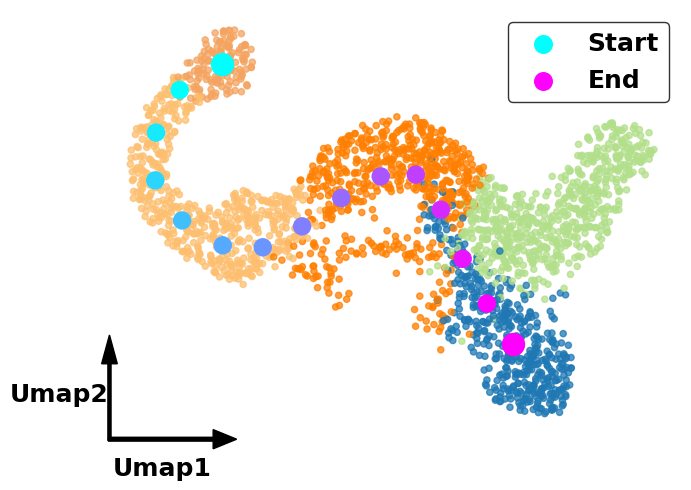

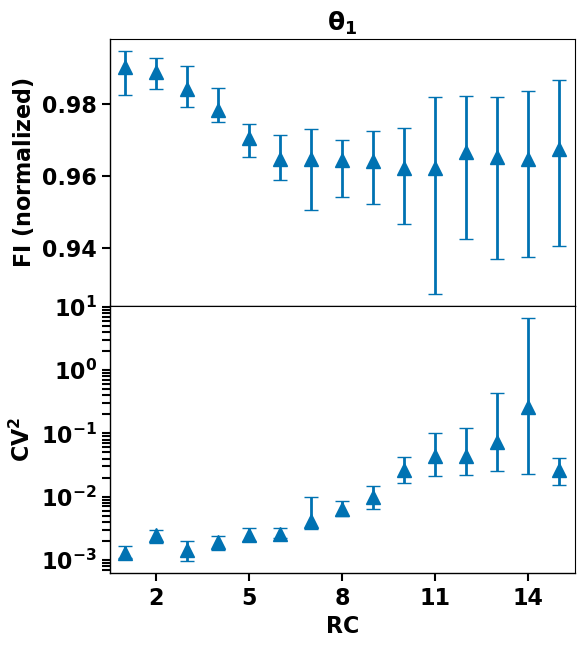

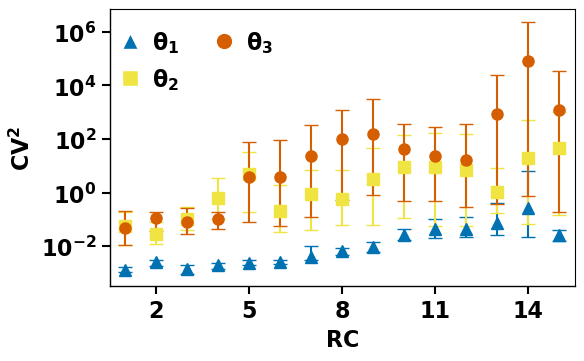

pca_svd_rc_mean_all:
[[[-8.258435    1.7924652   2.500415  ]
  [-8.311368    1.3763553   2.502355  ]
  [-7.955571   -2.9994185   2.4547815 ]
  ...
  [-8.13003    -2.790103   -2.1607218 ]
  [-8.140232   -3.1172101   1.396418  ]
  [-7.7097516  -4.177924    1.6476942 ]]

 [[-7.7544637  -2.3422315   1.4167998 ]
  [-7.5053797  -2.895457    1.6535071 ]
  [-7.5887613  -2.64339     1.8523254 ]
  ...
  [-7.326288   -3.5770652  -1.2197949 ]
  [-7.5520387  -3.0021923   1.4231468 ]
  [-7.592868    2.585028    1.857567  ]]

 [[-7.2528305  -1.787206   -1.6141263 ]
  [-7.1634994  -1.9097352  -1.7516543 ]
  [-7.1948757  -1.8164817  -1.758568  ]
  ...
  [-7.1166053  -2.0411954  -1.6709728 ]
  [-7.0312586  -2.3120341  -1.07913   ]
  [-6.9300175  -2.6263106  -2.0397608 ]]

 ...

 [[ 1.7643623   2.17595    -0.09695986]
  [ 3.4677978  -1.252622    0.6049382 ]
  [ 2.6986814   0.99135596 -0.83480614]
  ...
  [ 3.0494688  -0.669048    0.05048745]
  [ 2.8380709  -1.5471002   0.60867614]
  [ 3.2719955  -1.44896

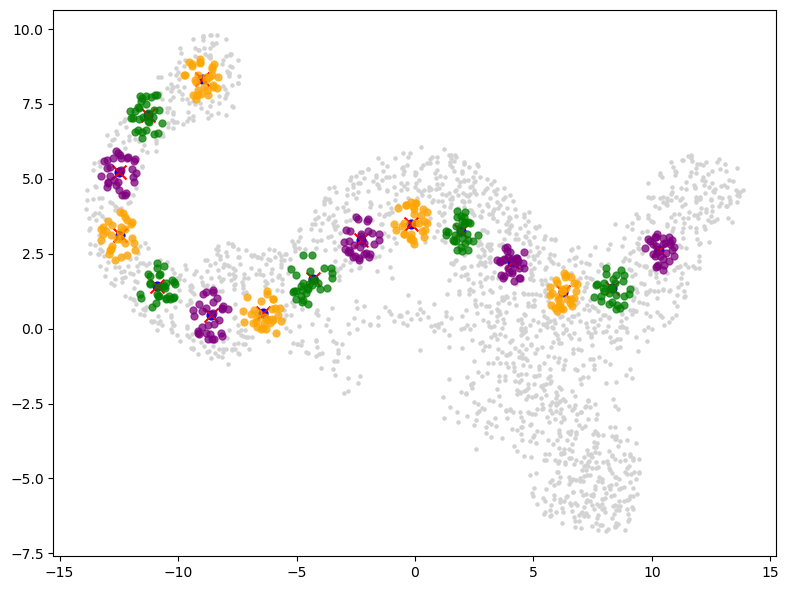

用的color_dict是： {'Ngn3 low EP': '#f4a460', 'Ngn3 high EP': '#fdbf6f', 'Fev+': '#ff7f00', 'Beta': '#b2df8a', 'Alpha': '#1f78b4'}
用的celltype_colors是： ['#ff7f00', '#1f78b4', '#fdbf6f', '#1f78b4', '#b2df8a', '#b2df8a', '#1f78b4', '#fdbf6f', '#f4a460', '#ff7f00', '#b2df8a', '#ff7f00', '#1f78b4', '#1f78b4', '#b2df8a', '#b2df8a', '#f4a460', '#b2df8a', '#1f78b4', '#ff7f00', '#ff7f00', '#b2df8a', '#1f78b4', '#b2df8a', '#1f78b4', '#b2df8a', '#b2df8a', '#1f78b4', '#fdbf6f', '#fdbf6f', '#fdbf6f', '#1f78b4', '#ff7f00', '#1f78b4', '#1f78b4', '#ff7f00', '#1f78b4', '#fdbf6f', '#fdbf6f', '#fdbf6f', '#fdbf6f', '#fdbf6f', '#fdbf6f', '#b2df8a', '#ff7f00', '#fdbf6f', '#ff7f00', '#fdbf6f', '#fdbf6f', '#b2df8a', '#fdbf6f', '#b2df8a', '#b2df8a', '#1f78b4', '#1f78b4', '#ff7f00', '#1f78b4', '#1f78b4', '#ff7f00', '#b2df8a', '#f4a460', '#1f78b4', '#b2df8a', '#fdbf6f', '#b2df8a', '#fdbf6f', '#ff7f00', '#1f78b4', '#f4a460', '#fdbf6f', '#fdbf6f', '#ff7f00', '#b2df8a', '#1f78b4', '#f4a460', '#b2df8a', '#ff7f00', '#1f7

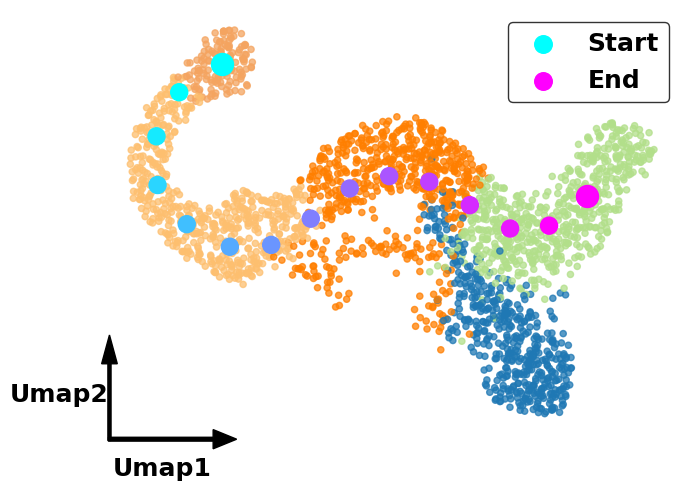

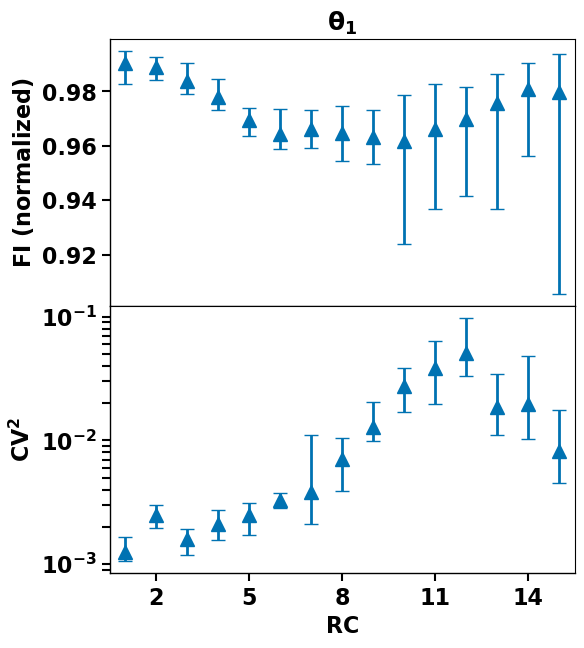

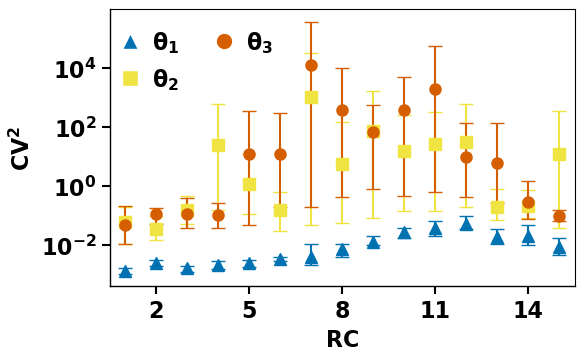

pca_svd_rc_mean_all:
[[[-8.311368    1.3763554   2.502355  ]
  [-8.258435    1.7924652   2.5004148 ]
  [-7.955571   -2.9994185   2.4547815 ]
  ...
  [-8.13003    -2.790103   -2.1607218 ]
  [-8.140232   -3.1172101   1.3964179 ]
  [-7.709752   -4.177924    1.6476942 ]]

 [[-7.721022   -2.2911656   1.4324452 ]
  [-7.4509373  -3.182422   -1.224726  ]
  [-7.636134   -2.5297368  -1.6707547 ]
  ...
  [-7.59638    -2.5136259  -1.7495193 ]
  [-7.3635893  -3.3151155  -1.6442904 ]
  [-7.5049357  -2.9841552  -1.4778106 ]]

 [[-7.2144027  -1.6712064  -1.5902293 ]
  [-7.1683044  -1.681999    1.5000211 ]
  [-7.1350565  -1.6439611  -1.927033  ]
  ...
  [-6.8895125  -2.3828974  -1.6847509 ]
  [-7.1579     -1.6973389  -1.3904291 ]
  [-7.1487584  -1.8504026  -1.480463  ]]

 ...

 [[ 3.6247919  -2.025179    1.3728235 ]
  [ 3.8545182  -2.0664952   0.5351791 ]
  [ 3.8961208  -1.6602489  -0.42893246]
  ...
  [ 3.9836323  -1.6132693   1.1132911 ]
  [ 3.4840944  -2.003994    1.0798955 ]
  [ 4.1403203  -1.12790

In [ ]:
data_name = "EG_ab_bin"
[k_nei, K, L] = [20, 3, 15]
[pca_dim, k_rc, d_pca, nrc] = [50, 30, 10, 10]

clusters_name = "clusters"
root_cluster = "Ngn3 low EP"
loc_path_graph = 'upper right'
basis = "umap"

branch = [np.array(['Ngn3 low EP', 'Ngn3 high EP', 'Fev+', 'Alpha']), 
        np.array(['Ngn3 low EP', 'Ngn3 high EP', 'Fev+', 'Beta']) ]

for t_list in (branch):

    branch_name = t_list[-1]
    adata0 = scv.read(data_path+data_name+'.h5ad', cache=True)
    adata = adata0.copy()
    scv.pp.pca(adata, n_comps=pca_dim)
    scv.pp.neighbors(adata, n_neighbors=k_nei)
    scv.pp.moments(adata, n_pcs=pca_dim, n_neighbors=k_nei)
    scv.tl.velocity(adata)
    print(adata)

    # average_path = np.load(path_path + f'{data_name}_{branch_name}_P2M_rc_nrc_{nrc}_dpca_{d_pca}.npy') 
    # cell_arr, nearest_cell = find_nearest_indices_voronoi(adata = adata, path0= average_path, rc_distance= "X_pca", n_nei=k_rc, dim_n=10)            
    # average_path = np.array(adata[nearest_cell].obsm["X_umap"])
    for nrc in [15]:
        average_path = np.load(path_path + f'{data_name}_{branch_name}_P2M_rc_nrc_{nrc}.npy') 
        print("average_path.shape", average_path.shape)
        cell_arr, nearest_cell = find_nearest_indices_voronoi(adata = adata, path0= average_path, n_nei = k_rc, rc_distance= "X_umap")


        # fig = sc.pl.embedding(
        #     adata,
        #     # color=[clusters_name, "paga"],
        #     color=[clusters_name],
        #     basis="pca",
        #     color_map=cmap,
        #     return_fig=True
        # )

        X_pca = adata.obsm['X_pca']
        row = np.array([np.ones((k_nei,))*i for i in range(adata.shape[0])]).flatten()
        col = adata.uns['neighbors']['indices'].flatten()
        w_val = np.array([np.linalg.norm(X_pca[int(i),:]-X_pca[int(j),:]) for i,j in zip(row,col)])
        adj_val = np.ones(col.shape)
        A_mat = csr_matrix((adj_val, (row, col)), shape=(adata.shape[0], adata.shape[0]))
        A = A_mat
        W_mat = csr_matrix((w_val, (row, col)), shape=(adata.shape[0], adata.shape[0]))
        dc=np.mean(w_val)
        cell_nei=adata.uns['neighbors']['indices']
        nei_w=[]
        rho_arr=[]
        for ni in adata.uns['neighbors']['indices']:
            dij=np.array([np.linalg.norm(X_pca[int(ni[0]),:]-X_pca[int(i),:]) for i in ni[1:]])
            rho=np.sum(np.exp(-dij**2/dc**2))
            nei_w.append(np.exp(-dij**2/dc**2)/np.sum(np.exp(-dij**2/dc**2)))
            rho_arr.append(rho)
            
        rho_arr=np.array(rho_arr)/np.amax(rho_arr)
        nei_w=np.array(nei_w)
        nei_w=np.hstack((np.ones((nei_w.shape[0],1)),nei_w))/2

        def smooth_func(X_val,cell_nei=cell_nei,nei_w=nei_w):
            X_s=X_val.copy()
            for ci in range(len(X_val)):
                X_s[ci]=np.dot(X_val[cell_nei[ci,:]],nei_w[ci,:])
            return X_s

        if basis == "umap":
            X_umap = adata.obsm['X_umap']
            X_plt = X_umap[:,0]
            Y_plt = X_umap[:,1]
            X_min = np.min(X_plt)
            X_max = np.max(X_plt)
            Y_min = np.min(Y_plt)
            Y_max = np.max(Y_plt)
            X_len = (X_max-X_min)/5
            Y_len = (Y_max-Y_min)/5
            wid = min(X_len,Y_len)/30
            X_ori = X_min-wid*10
            Y_ori = Y_min-wid*10
        elif basis == "pca":
            X_umap = adata.obsm['X_pca'][:, :2]
            X_plt = X_umap[:,0]
            Y_plt = X_umap[:,1]
            X_min = np.min(X_plt)
            X_max = np.max(X_plt)
            Y_min = np.min(Y_plt)
            Y_max = np.max(Y_plt)
            X_len = (X_max-X_min)/5
            Y_len = (Y_max-Y_min)/5
            wid = min(X_len,Y_len)/30
            X_ori = X_min-wid*10
            Y_ori = Y_min-wid*10

        X = torch.tensor(adata.layers['Ms'], dtype=torch.float32) 
        Encoder_path = "encoder/"
        # for pca in [X_pca, eigengene, hotspot]:

        model_path = Encoder_path + data_name+' '+str([k_nei,K,L])+'/'
        # eigengene = np.load(f"{model_path}cell_eigen_X.npy")
        # hotspot = np.load(f"{model_path}cell_hs_X.npy")
        model_name = f"{model_path}encoder.pt"
        model = torch.load(f'{model_name}')
        mu, sigma = model(torch.tensor(X))
        mu_learned = mu.detach().numpy()

        sigma_learned = sigma.detach().numpy()
        Fisher_g=np.zeros((X.shape[0],L*2,L*2))
        for i in range(X.shape[0]):
            for j in range(L):
                Fisher_g[i,j,j]=1/sigma_learned[i,j]**2
                Fisher_g[i,L+j,L+j]=2/sigma_learned[i,j]**2
        Fisher_g_diag = np.zeros([X.shape[0],L*2])
        for i in range(X.shape[0]):
            Fisher_g_diag[i] = np.diag(Fisher_g[i])
        ## 1_1这一步用了一个神经网络 pca -> Z(mu,sigma), 然后求出这个网络的pZ_pEg。
        for pca in [X_pca]:
            print("pca.shape:", pca.shape)
            reset_seeds(0) # 0
            model = nn.Sequential(
                nn.Linear(pca.shape[1], 128),
                nn.ReLU(),
                nn.Linear(128,64),
                nn.ReLU(),
                nn.Linear(64,2*L),
            )
            loss_fn = nn.MSELoss()
            optimizer = SGD(model.parameters(), lr=0.01, weight_decay=0.001)#, momentum=0.2
            x_in=torch.tensor(pca, dtype=torch.float32)
            latent_z = np.hstack((mu_learned,sigma_learned))
            x_out=torch.tensor(latent_z.astype(np.float32))
            for epoch in range(200): # 200
                # break
                optimizer.zero_grad()
                output = model(x_in)
                loss = loss_fn(output,x_out) 
                loss.backward()
                optimizer.step()
            pZ_ppca = p_out_p_in(pca, model, dim_out = 2 * L)

            ### 链式法则（已知FI_Z），求出FI_pca。
            FI_pca = np.einsum("ijk,ij,ijh->ikh",pZ_ppca, Fisher_g_diag, pZ_ppca)
            print("FI_pca.shape:", FI_pca.shape)
            # FI_Eg_diag = FI_Eg[:, range(eigengene.shape[1]), range(eigengene.shape[1])]
            # U_FI_Eg[i]的列向量是特征向量。Ax = /lamba x (从这可以看出x是列向量)
            # 不过U_FI_Eg[i]的行向量和列向量的模长都是1.而且行和行彼此正交。列和列彼此正交。这是因为UU_T = I. U是正交矩阵。
            U_FI_Eg, S_FI_Eg, Vt_FI_Eg = np.linalg.svd(FI_pca, full_matrices=False)
            print("svd后(U_FI_Eg, S_FI_Eg, Vt_FI_Eg)：",U_FI_Eg.shape, S_FI_Eg.shape, Vt_FI_Eg.shape)

            # rc_path(adata, mu_learned, sigma_learned, average_path, basis, k_nei, data_name)
            cell_arr_plot(average_path, cell_arr, X_umap)
            rc_path_celltype(adata, average_path, basis, data_name, save = save, figure_path = figure_path, branch_name  = branch_name)
                
            dim = 3
            # U_FI_Eg和pca的各列都是正交的才可以这么算。cell_i_的pca坐标（向量）点积u1得到的就是u1的坐标，这其实就是在u1上做投影。
            # NOTE:这可能是为什么eigengene和hotspot不行的原因，eigengene的各坐标系间不是正交的。
            pca_svd_rc_variance_all, pca_svd_rc_mean_all= compute_variances(U_FI_Eg, pca, cell_arr, k_rc= k_rc, L = L, simple=dim/2, cv= True)
            pca_svd_rc_variance_average = np.array([np.mean(arr, axis=0) for arr in pca_svd_rc_variance_all])
            # plot_all_variances_odd(pca_svd_rc_variance_all, share_y = False)
            FI_VAR_double_grid(S_FI_Eg, pca_svd_rc_variance_all, pca, 0.5, cell_arr, norm=True, simple= False, 
                            save = save, figure_path = figure_path, branch_name  = branch_name)

            exclude_indices = []
            all_indices = list(range(len(pca_svd_rc_variance_all)))
            keep_indices = [i for i in all_indices if i not in exclude_indices]
            new_array = np.array(pca_svd_rc_variance_all)[keep_indices]

            variance_along_rc(cell_arr, new_array, dim = dim, save = save, figure_path = figure_path, branch_name  = branch_name)

            print("pca_svd_rc_mean_all:")
            print(np.array(pca_svd_rc_mean_all))